# Week4授業前課題1 アヤメの分類

In [161]:
# 最初に使用予定のデータやライブラリーを宣言しておく
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。
irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length
＜実際の問題では？＞

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。
そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。
また、Week3で利用した散布図行列を使い可視化することも可能です。

In [97]:
"""
アイリスデータを取得。取得方法はweek3と同じ。
データフレームで抽出
virgicolorとvirginica
sepal_lengthとpetal_length
"""
iris = load_iris()

# df = pd.DataFrame(np.array(iris.data))
# df

# print(iris.data.shape)
# print(type(iris))

# iris.feature_names
# iris.target

# iris.target_names
# iris.feature_names
# 冨永最初考えていたやつ
# df1 = pd.DataFrame(np.array(iris.target),columns=['Species']) #データフレームのデータを良く見て判断した
# df1[df1['Species'].isin([1,2])] # データ値がわかっているのでisinを使った
# df1

df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1["species"] = iris.target
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
"""
アイリスデータを取得。取得方法はweek3と同じ。
データフレームで抽出
sepal_lengthとpetal_length
上記のデータとは違い、データの値は定数じゃないので
列で抽出する事にした。列の抽出は.loc を使うんだ！！
"""
# http://ailaby.com/lox_iloc_ix/#id1
# 列ラベルを指定
# 
# df.loc[:, ['col_1','col_2']]

# 冨永最初考えていたやつ
# df2 = pd.DataFrame(np.array(iris.data),columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
# df2.loc[:, ['sepal length (cm)','petal length (cm)']]

df2 = df1.loc[:,['sepal length (cm)','petal length (cm)', 'species']]
df2 = df2[df2["species"].isin(["1","2"])]
df2.head()

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。
sepal_lengthとpetal_lengthを使い、
virgicolorとvirginicaを分類するのは
少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、
抜き出したデータの散布図と箱ひげ図（boxplot）、
バイオリン図（violinplot）を表示してください。

＜実際の問題では？＞

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。
前処理
データに加工をしていきます。

In [99]:
"""
# 冨永最初考えていたやつ
# sns.pairplot(df1, hue='Species')
pg = sns.pairplot(df2, hue='sepal length (cm)')
# sns.pairplot(df2, hue='petal length (cm)')
print(type(pg))
"""
iris_virgicolor = df2[df2["species"] == 1]
iris_virginica = df2[df2["species"] == 2]

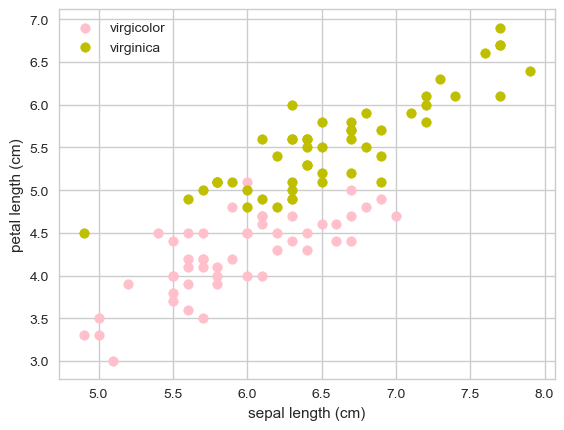

In [104]:
plt.scatter(iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"],c="pink",label="virgicolor")
plt.scatter(iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"],c="y",label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()
plt.show()

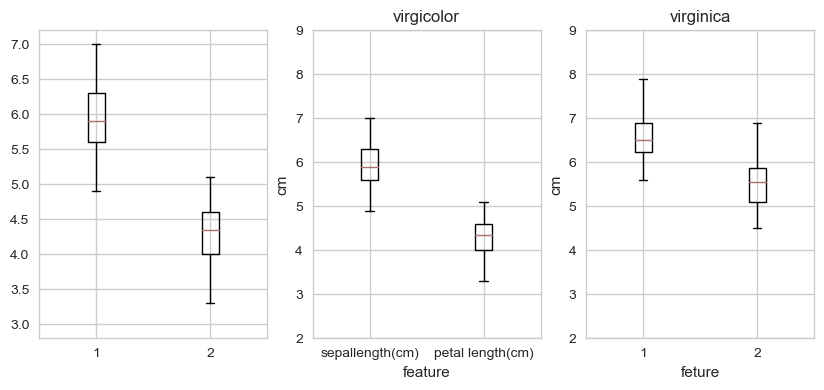

In [124]:
"""
抜き出したデータを元に下記を作成
・散布図
・箱ひげ図
・バイオリン図
# 散布図行列を出して見る

# 箱ひげ図
pg2 = df2.plot( kind='box')
print(type(pg2))
"""

plt.subplots(figsize=(10,4))

# plt.subplot(1,3,1) # これってどうゆう事？？表の出力させる位置を指定出来る!!!
# plt.boxplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # a二つのデーたを使用している

plt.subplot(1,3,2) # これってどうゆう事？？表の出力させる位置を指定出来る!!!
plt.boxplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # a二つのデーたを使用している
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2,9)

plt.subplot(1,3,3)
plt.boxplot([iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"]])
plt.xlabel("feture")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2,9)

plt.show()

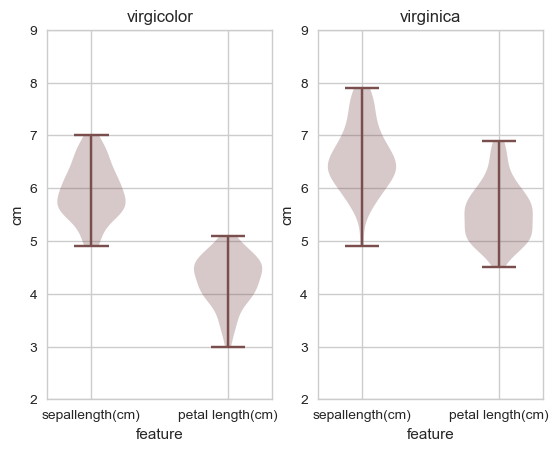

In [126]:
"""
# 冨永がはじめに考えたやつ。。なんでか出力されない。。
# バイオリン図
# グラフの見た目を良くする
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('pink')

# データフレームを投入する時は.meltが使いやすいらしい
df_melt = pd.melt(df2)
print(df_melt.head())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.violinplot(x='variable', y='value', data=df_melt, jitter=True, color='pink', ax=ax)

ax.set_xlabel('iris_columns')
ax.set_ylabel('value')
ax.set_ylim(-1, 9)
plt.show()
"""

plt.subplot(1,2,1) 
plt.violinplot([iris_virgicolor["sepal length (cm)"],iris_virgicolor["petal length (cm)"]]) # バイオリン図にしているだけ
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virgicolor")
plt.ylim(2,9)

plt.subplot(1,2,2) 
plt.violinplot([iris_virginica["sepal length (cm)"],iris_virginica["petal length (cm)"]]) # バイオリン図にしているだけ
plt.xticks([1,2],["sepallength(cm)","petal length(cm)"]) # データ名を指定している
plt.xlabel("feature")
plt.ylabel("cm")
plt.title("virginica")
plt.ylim(2,9)


plt.show()

### 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。
今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。
公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

＜注意点＞
データの分析まではPandasのDataFrameを使用してきました。
しかし、scikit-learnはNumPyのndarrayを想定して作られています。
そのため、この段階でndarrayへの変換を行いましょう。
特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

＜分割する理由＞
分類問題の目的は未知のデータを正しく分類することです。
その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。
この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。
学習に使うデータを訓練用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

In [136]:
"""
とりあえずデータを分割したい。訓練用と検証用の二つ。
で、それぞれの割合を75%,25%で分割する。
分割する時にdataframeは使えないのでnumpyで進める。
Xには特徴量、yには目的変数をそれぞれ numpy で作成する
"""
# df2.head()
# iris データ(df2)から特徴量だけに変換して numpy に変換(values)している。
X = df2.drop(columns = "species").values


In [138]:
# iris データ(df2)の目的変数だけ
y = df2["species"].values

In [149]:
# データ分割メソッドを使用する
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.25, random_state=42)
y_test

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2])

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

＜注意点＞
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

＜実際の問題での前処理は？＞
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [171]:
# fit_transform で標準化している。
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
# print(X_tr_sc)
# X_tr_fit_form = scaler.transform(X_tr_fit)
X_te_sc = sc.fit_transform(X_test)
# print(X_te_sc)

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [168]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
# neigh_fit = neigh.fit(X_train, y_train) 
# neigh_fit_pre = neigh_fit.predict
# print(neigh_fit_pre)
print(neigh.predict(X_train))


NotFittedError: Must fit neighbors before querying.